In [47]:
import cv2
import numpy as np
from MTM import matchTemplates, drawBoxesOnRGB

import cv2
from skimage.data import coins
from skimage.data import immunohistochemistry
import matplotlib.pyplot as plt

In [28]:
from multi_scale_edge_detection.MultiScaleContourDetector import multi_scale_contour_detection_with_inhibition

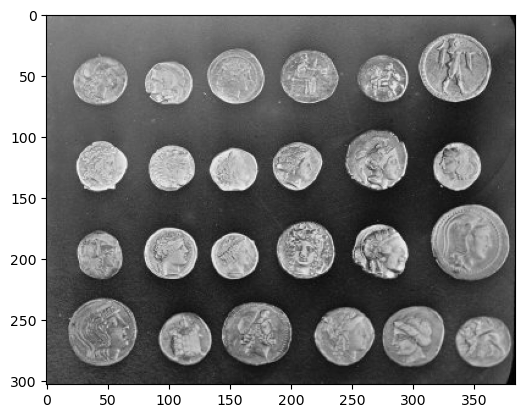

In [29]:
image = coins()
plt.imshow(image, cmap="gray")

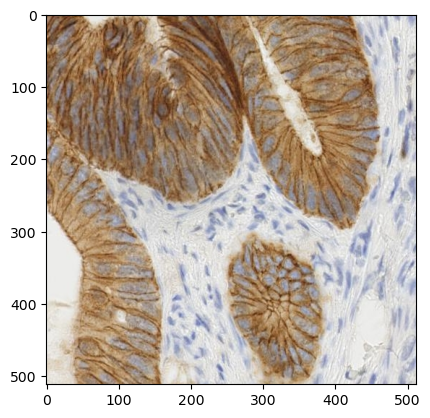

In [48]:
image1 = immunohistochemistry()
plt.imshow(image1, cmap="gray")

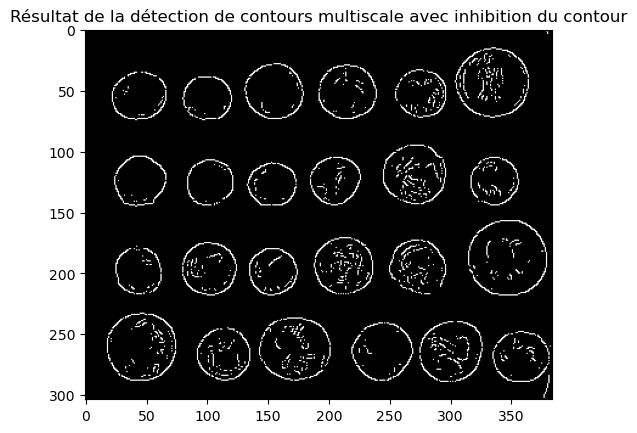

In [49]:
result = multi_scale_contour_detection_with_inhibition(image, N=5, sigma=1, alpha=0.00001)

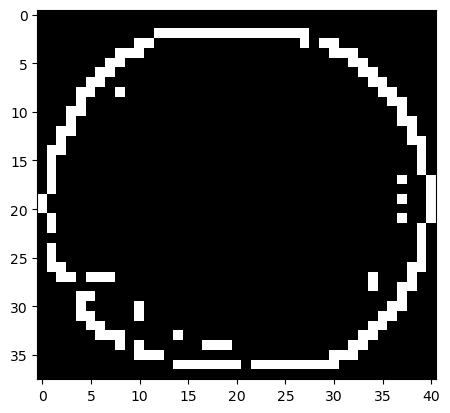

In [31]:
smallCoin = result[37:37+38, 80:80+41] 


plt.imshow(smallCoin, cmap="gray")

In [59]:
# 1st format the template into a list of tuple (label, templateImage)
listTemplate = [('small', smallCoin)]

# Then call the function matchTemplates (here a single template)
Hits = matchTemplates(listTemplate, result, score_threshold=0.3, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0)

In [51]:
print("Found {} hits".format( len(Hits.index) ) )
Hits

Found 9 hits


,TemplateName,BBox,Score
0,small,"(80, 37, 41, 38)",0.845351
1,small,"(133, 108, 41, 38)",0.485452
2,small,"(134, 179, 41, 38)",0.471695
3,small,"(26, 103, 41, 38)",0.371382
4,small,"(316, 105, 41, 38)",0.364136
5,small,"(82, 106, 41, 38)",0.360567
6,small,"(27, 34, 41, 38)",0.343915
7,small,"(186, 103, 41, 38)",0.340072
9,small,"(23, 179, 41, 38)",0.311964


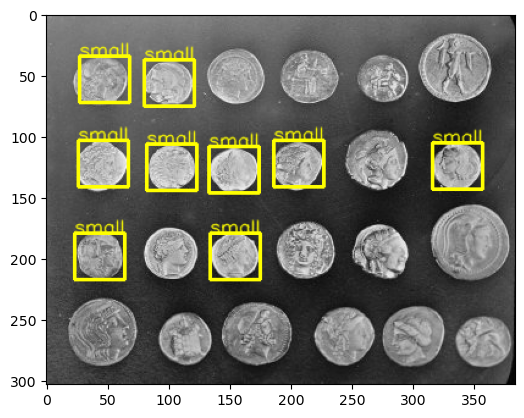

In [52]:
Overlay = drawBoxesOnRGB(image, Hits, showLabel=True)
plt.imshow(Overlay)

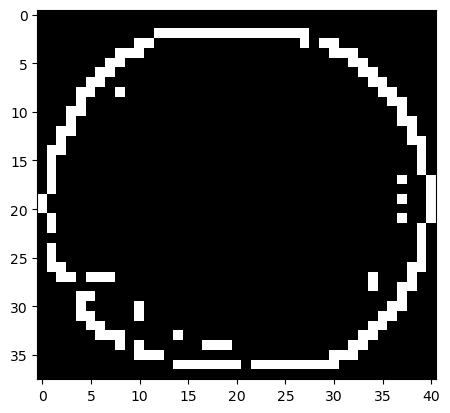

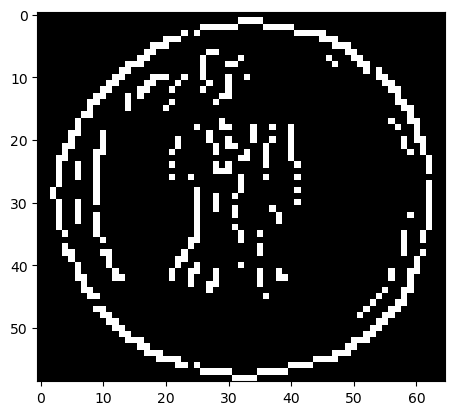

In [53]:
largeCoin = result[14:14+59,302:302+65]
plt.figure(0)
plt.imshow(smallCoin, cmap="gray")
plt.figure(1)
plt.imshow(largeCoin, cmap="gray")

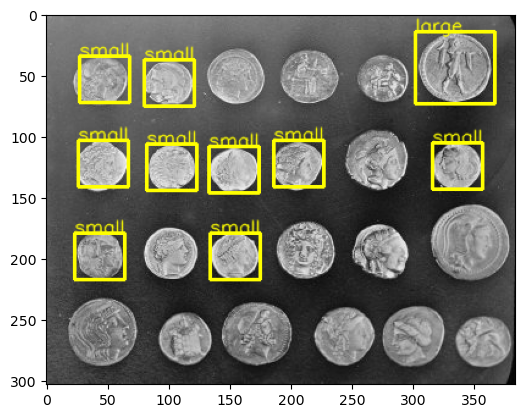

In [58]:
listTemplate = [("small", smallCoin), ("large", largeCoin)]
Hits = matchTemplates(listTemplate, result, score_threshold=0.3, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0)
Overlay = drawBoxesOnRGB(image, Hits, showLabel=True)
plt.imshow(Overlay)

In [60]:
import cv2

# Path to the video file
video_path = 'elephant.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video file was successfully opened
if not cap.isOpened():
    print("Error: Unable to open video file.")
    exit()

# Initialize an empty list to store frames
frames = []

# Read the video frame by frame
while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if not ret:
        break

    # Append the frame to the frames list
    frames.append(frame)

# Release the video capture object
cap.release()

# Convert the list of frames to a numpy array
frames_array = np.array(frames)

# Print the shape of the frames array
print("Shape of frames array:", frames_array.shape)


Shape of frames array: (542, 720, 1280, 3)


In [73]:
normalized_frames = []

# Iterate over each frame array
for frame in frames_array:
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Normalize the pixel values to range [0, 1]
    normalized_frame = gray_frame / 255.0
    
    # Append the normalized grayscale frame to the list
    normalized_frames.append(normalized_frame)

print("Normalization and storing completed.")

Normalization and storing completed.


In [ ]:
# Create an empty list to store the results
results_list = []

# Iterate over each normalized grayscale frame
for frame in normalized_frames:
    # Apply the function to the current frame and store the result
    result = multi_scale_contour_detection_with_inhibition(frame, N=8, sigma=1, alpha=0.00001)
    
    # Append the result to the results_list
    results_list.append(result)

print("Multi-scale contour detection completed for all frames.")

In [84]:
resy = len(results_list)
resy

199

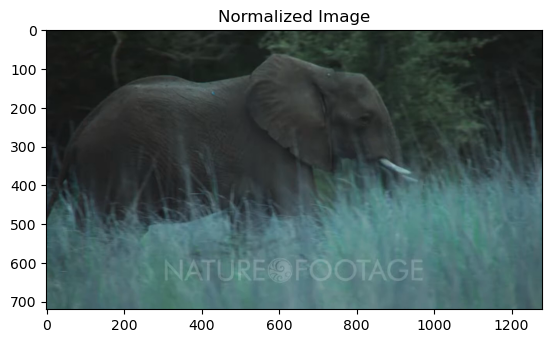

In [61]:
frame1 = frames_array[0]
plt.imshow(frame1 , cmap='gray')
plt.title('first frame')
plt.show()

In [63]:
import cv2
import numpy as np

# Convert the image to grayscale
gray_image = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

# Normalize the pixel values to range [0, 1]
normalized_image = gray_image / 255.0

# Save the images to files
cv2.imwrite('original_image.jpg', gray_image)
cv2.imwrite('normalized_image.jpg', normalized_image * 255.0)

print("Images saved successfully.")

Images saved successfully.


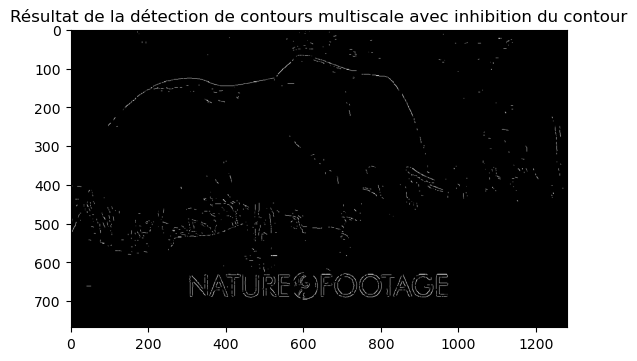

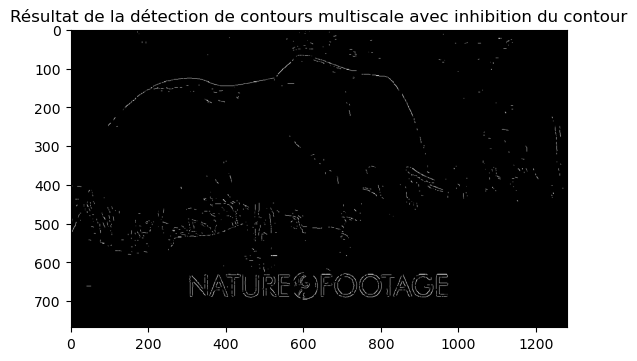

In [74]:
results1 = multi_scale_contour_detection_with_inhibition(normalized_image, N=8, sigma=1, alpha=0.00001)
results2 = multi_scale_contour_detection_with_inhibition(normalized_frames[1], N=8, sigma=1, alpha=0.00001)

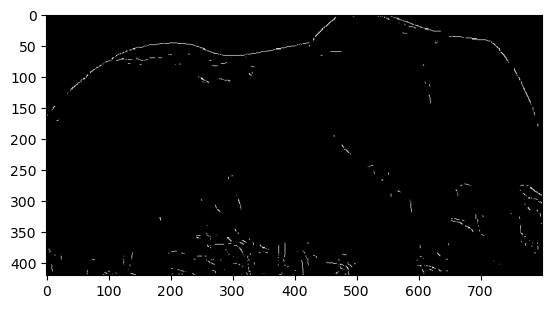

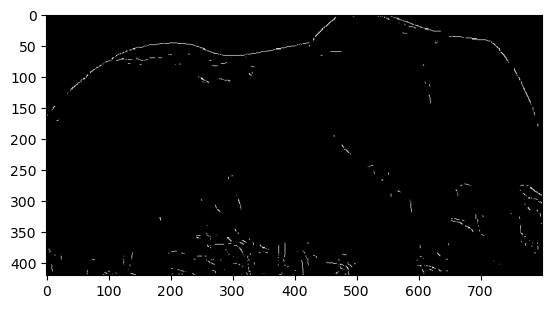

In [76]:
temp1 = results1[80:500,100:900]
temp2 = results2[80:500,100:900]
plt.figure(0)
plt.imshow(temp1, cmap="gray")
plt.figure(1)
plt.imshow(temp2, cmap="gray")

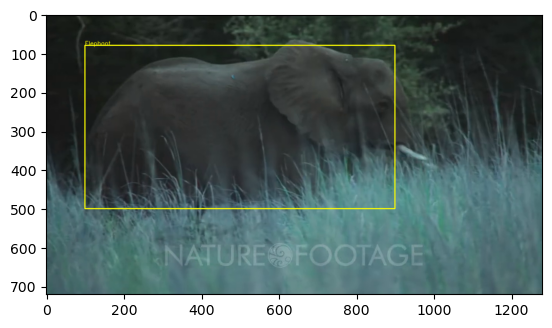

In [95]:
listTemplate = [("Elephant", temp1), ("ELEPHANT", temp2)]
Hits = matchTemplates(listTemplate, results_list[1], score_threshold=0.5, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0)
Overlay = drawBoxesOnRGB(frames_array[15], Hits, showLabel=True)
plt.imshow(Overlay)

In [96]:
print("Found {} hits".format( len(Hits.index) ) )
Hits

Found 1 hits


,TemplateName,BBox,Score
0,Elephant,"(100, 80, 800, 420)",1.0
